In [44]:
import pandas as pd 
import numpy as np
import pickle 

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
!pip install flask

     ------------------------------------ 103.0/103.0 kB 197.7 kB/s eta 0:00:00
     -------------------------------------- 224.5/224.5 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 134.9/134.9 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 98.2/98.2 kB 2.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<e><b><h1> Data exploration </b></h1></e>

In [24]:
data = pd.read_csv(r"C:\Users\lenovo\Downloads\DatasetForCoffeeSales2.csv")
data 

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472
...,...,...,...,...,...,...,...,...,...,...,...
725,12/26/2024,4,Hail,coffee beans,Colombian,40,26,1040,False,0,1040
726,12/27/2024,63,Mecca,coffee beans,Colombian,40,10,400,False,0,400
727,12/28/2024,39,Abha,coffee beans,Costa Rica,35,47,1645,False,0,1645
728,12/29/2024,57,Tabuk,coffee beans,Ethiopian,45,3,135,True,27,108


In [25]:
print(f'number of rows: {data.shape[0]} \nnumber of columns: {data.shape[1]}')

number of rows: 730 
number of columns: 11


In [26]:
data.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [27]:
data.tail()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
725,12/26/2024,4,Hail,coffee beans,Colombian,40,26,1040,False,0,1040
726,12/27/2024,63,Mecca,coffee beans,Colombian,40,10,400,False,0,400
727,12/28/2024,39,Abha,coffee beans,Costa Rica,35,47,1645,False,0,1645
728,12/29/2024,57,Tabuk,coffee beans,Ethiopian,45,3,135,True,27,108
729,12/30/2024,50,Medina,coffee beans,Brazilian,30,33,990,True,198,792


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


In [29]:
data.describe()

,Customer_ID,Unit Price,Quantity,Sales Amount,Discount_Amount,Final Sales
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,51.669863,36.794521,26.080822,959.924658,97.393151,862.531507
std,29.014339,4.955104,14.480971,551.282730,123.401350,509.032315
min,1.000000,30.000000,1.000000,30.000000,0.000000,24.000000
25%,27.250000,35.000000,14.000000,495.000000,0.000000,448.000000
50%,52.000000,35.000000,27.000000,960.000000,13.000000,840.000000
75%,77.000000,40.000000,39.000000,1400.000000,192.000000,1260.000000
max,100.000000,45.000000,49.000000,2205.000000,441.000000,2205.000000


In [30]:
data.isnull().sum()

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
Final Sales        0
dtype: int64

In [31]:
for column in data.columns:
    print(column)

Date
Customer_ID
City
Category
Product
Unit Price
Quantity
Sales Amount
Used_Discount
Discount_Amount
Final Sales


In [32]:
data.nunique()

Date               730
Customer_ID        100
City                10
Category             1
Product              5
Unit Price           4
Quantity            49
Sales Amount       149
Used_Discount        2
Discount_Amount    134
Final Sales        243
dtype: int64

<b><h1>Lab 10 Task</b></h1>


In [33]:
# dropping irrelevant columns 

data.drop('Date', axis = 1 , inplace=True)
data.drop('Customer_ID', axis = 1 , inplace=True)
data.drop('Used_Discount', axis = 1 , inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             730 non-null    object
 1   Category         730 non-null    object
 2   Product          730 non-null    object
 3   Unit Price       730 non-null    int64 
 4   Quantity         730 non-null    int64 
 5   Sales Amount     730 non-null    int64 
 6   Discount_Amount  730 non-null    int64 
 7   Final Sales      730 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 45.8+ KB


In [35]:
# change type to int

def encode(x):
    le = LabelEncoder()
    for col in x:
        data[col] = le.fit_transform(data[col])

columns = ['Product', 'Category', 'City' ]
encode(columns)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   City             730 non-null    int64
 1   Category         730 non-null    int64
 2   Product          730 non-null    int64
 3   Unit Price       730 non-null    int64
 4   Quantity         730 non-null    int64
 5   Sales Amount     730 non-null    int64
 6   Discount_Amount  730 non-null    int64
 7   Final Sales      730 non-null    int64
dtypes: int64(8)
memory usage: 45.8 KB


<b><h1>Lab Task 11 </b></h1>

In [37]:
X = data[[ 'City', 'Product', 'Unit Price', 'Quantity']]
y = data['Final Sales']

In [38]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, shuffle = False )

In [39]:
model = GradientBoostingRegressor()
model.fit(trainX, trainY)
print(model)

GradientBoostingRegressor()


In [40]:
predictions = model.predict(testX)

In [41]:
mse = mean_squared_error(testY, predictions)
print(mse**0.5)
error = (mse**0.5 / 2205)*100
print(f'error: {error}%')

120.53890408955057
error: 5.466616965512498%


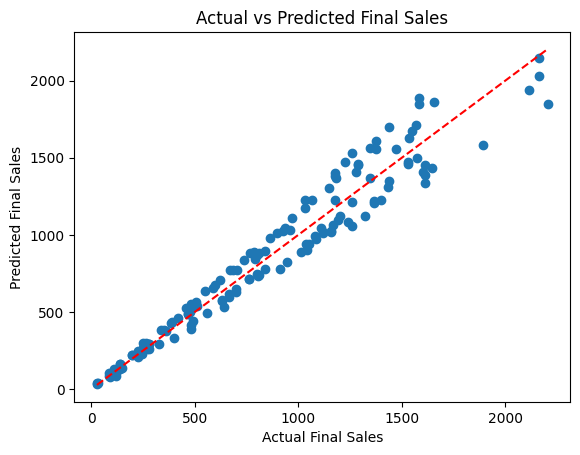

In [42]:
import matplotlib.pyplot as plt

plt.scatter(testY, predictions)
plt.xlabel("Actual Final Sales")
plt.ylabel("Predicted Final Sales")
plt.title("Actual vs Predicted Final Sales")
plt.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'r--')  # perfect prediction line
plt.show()

In [43]:
joblib.dump(model, 'model.pkl')

['model.pkl']